## PROBLEM STATEMENT :
    A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
    The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## DATA DEFINITION
MSSubClass: Identifies the type of dwelling involved in the sale.
MSZoning: Identifies the general zoning classification of the sale.
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access to property
Alley: Type of alley access to property
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to various conditions
Condition2: Proximity to various conditions (if more than one is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Rates the overall material and finish of the house
OverallCond: Rates the overall condition of the house
YearBuilt: Original construction date
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Evaluates the quality of the material on the exterior 
ExterCond: Evaluates the present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Evaluates the height of the basement
BsmtCond: Evaluates the general condition of the basement
BsmtExposure: Refers to walkout or garden level walls
BsmtFinType1: Rating of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Rating of basement finished area (if multiple types)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
Kitchen: Kitchens above grade
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality (Assume typical unless deductions are warranted)
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold (MM)
YrSold: Year Sold (YYYY)
SaleType: Type of sale
SaleCondition: Condition of sale

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# For Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
# For Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
# For Split dataset into train test
from sklearn.model_selection import train_test_split
# For Scaling
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
# For Ridge and Lasso
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,KFold
# For Gaussian transformation
from sklearn.preprocessing import PowerTransformer
# Feature reduction
from sklearn.feature_selection import RFE

In [2]:
#fetching data
house_price = pd.read_csv("C:/SHUBHANGI/Machine Leaning II/AdvanceRegressionAssignment/train.csv")
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As we can see from the above that there are certain columns where null value percentage is very high and the columns are of type either int/float/object. This was bound to happen as in data dexcription given to us in many columns na value is present. We will treat them appropritely later. Meanwhile we will describe the dataset.

In [4]:
# Check for data in dataset
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house_price.shape

(1460, 81)

#### Checking for null values

In [6]:
round(100 * (house_price.isnull().sum()/len(house_price.index)),2).sort_values(ascending=False).head(18)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64

#### Considering 10% as threshold, dropping columns have null alues for more than 10%
Most of the column missing values have null percentage more than 45, only LotFrontage has 17% missing values, thus we will remove column with missing values more than 10%

In [7]:
round(100 * (house_price.isnull().sum()/len(house_price.index)),2)[round(100 * (house_price.isnull().sum()/len(house_price.index)),2).values> 10]

LotFrontage    17.74
Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

#### Dropping all the above columns 

In [8]:
del_column = ['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold']
house_price = house_price.drop(columns = del_column, axis= 1)
house_price.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,2008,WD,Normal,250000


In [9]:
round(100 * (house_price.isnull().sum()/len(house_price.index)),2).sort_values(ascending=False).head(18)

GarageFinish    5.55
GarageType      5.55
GarageCond      5.55
GarageQual      5.55
GarageYrBlt     5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
RoofStyle       0.00
RoofMatl        0.00
SalePrice       0.00
Exterior1st     0.00
Exterior2nd     0.00
dtype: float64

## EDA 

In [10]:
## Checking for all numerical columns with missing values
num_columns = house_price.select_dtypes(include=['number']).columns
num_columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

Now we will impute value accordingly, as we know from data definition that NA means No Garage or No Basement, we will impute the values of categorical columns accordingly. Whereas for numerical column we will impute it with mean/Median values


In [11]:
#If there is no Masonry veneer type then we can replace MASVnr area with zero
house_price.MasVnrArea.fillna(0,inplace=True)

In [12]:
round(100 * (house_price.isnull().sum()/len(house_price.index)),2).sort_values(ascending=False).head(18)

GarageType      5.55
GarageYrBlt     5.55
GarageCond      5.55
GarageQual      5.55
GarageFinish    5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
Electrical      0.07
Exterior1st     0.00
RoofStyle       0.00
RoofMatl        0.00
SalePrice       0.00
Exterior2nd     0.00
YearBuilt       0.00
dtype: float64

Checking one of the categorical column GarageQual and checking how the data is distributed across different categories

In [13]:
house_price['GarageQual'].value_counts(normalize=True)

TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: GarageQual, dtype: float64

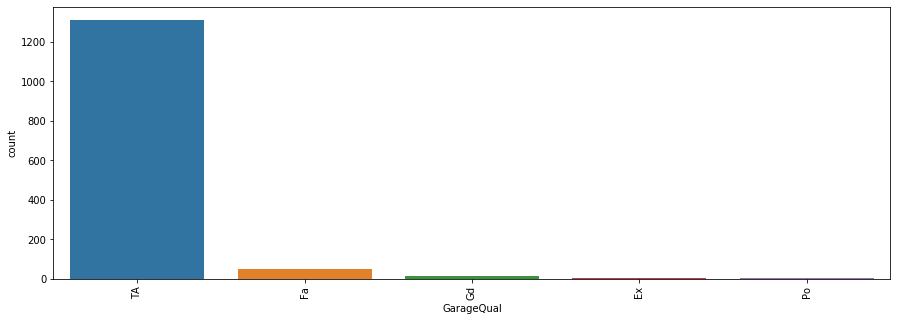

In [14]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(house_price.GarageQual)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## Plotting all categorical column and checking for data distribution

In [15]:
cat_columns = ['GarageType','GarageFinish', 'GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtFinType1',
              'BsmtQual','BsmtCond','Electrical','MasVnrType']

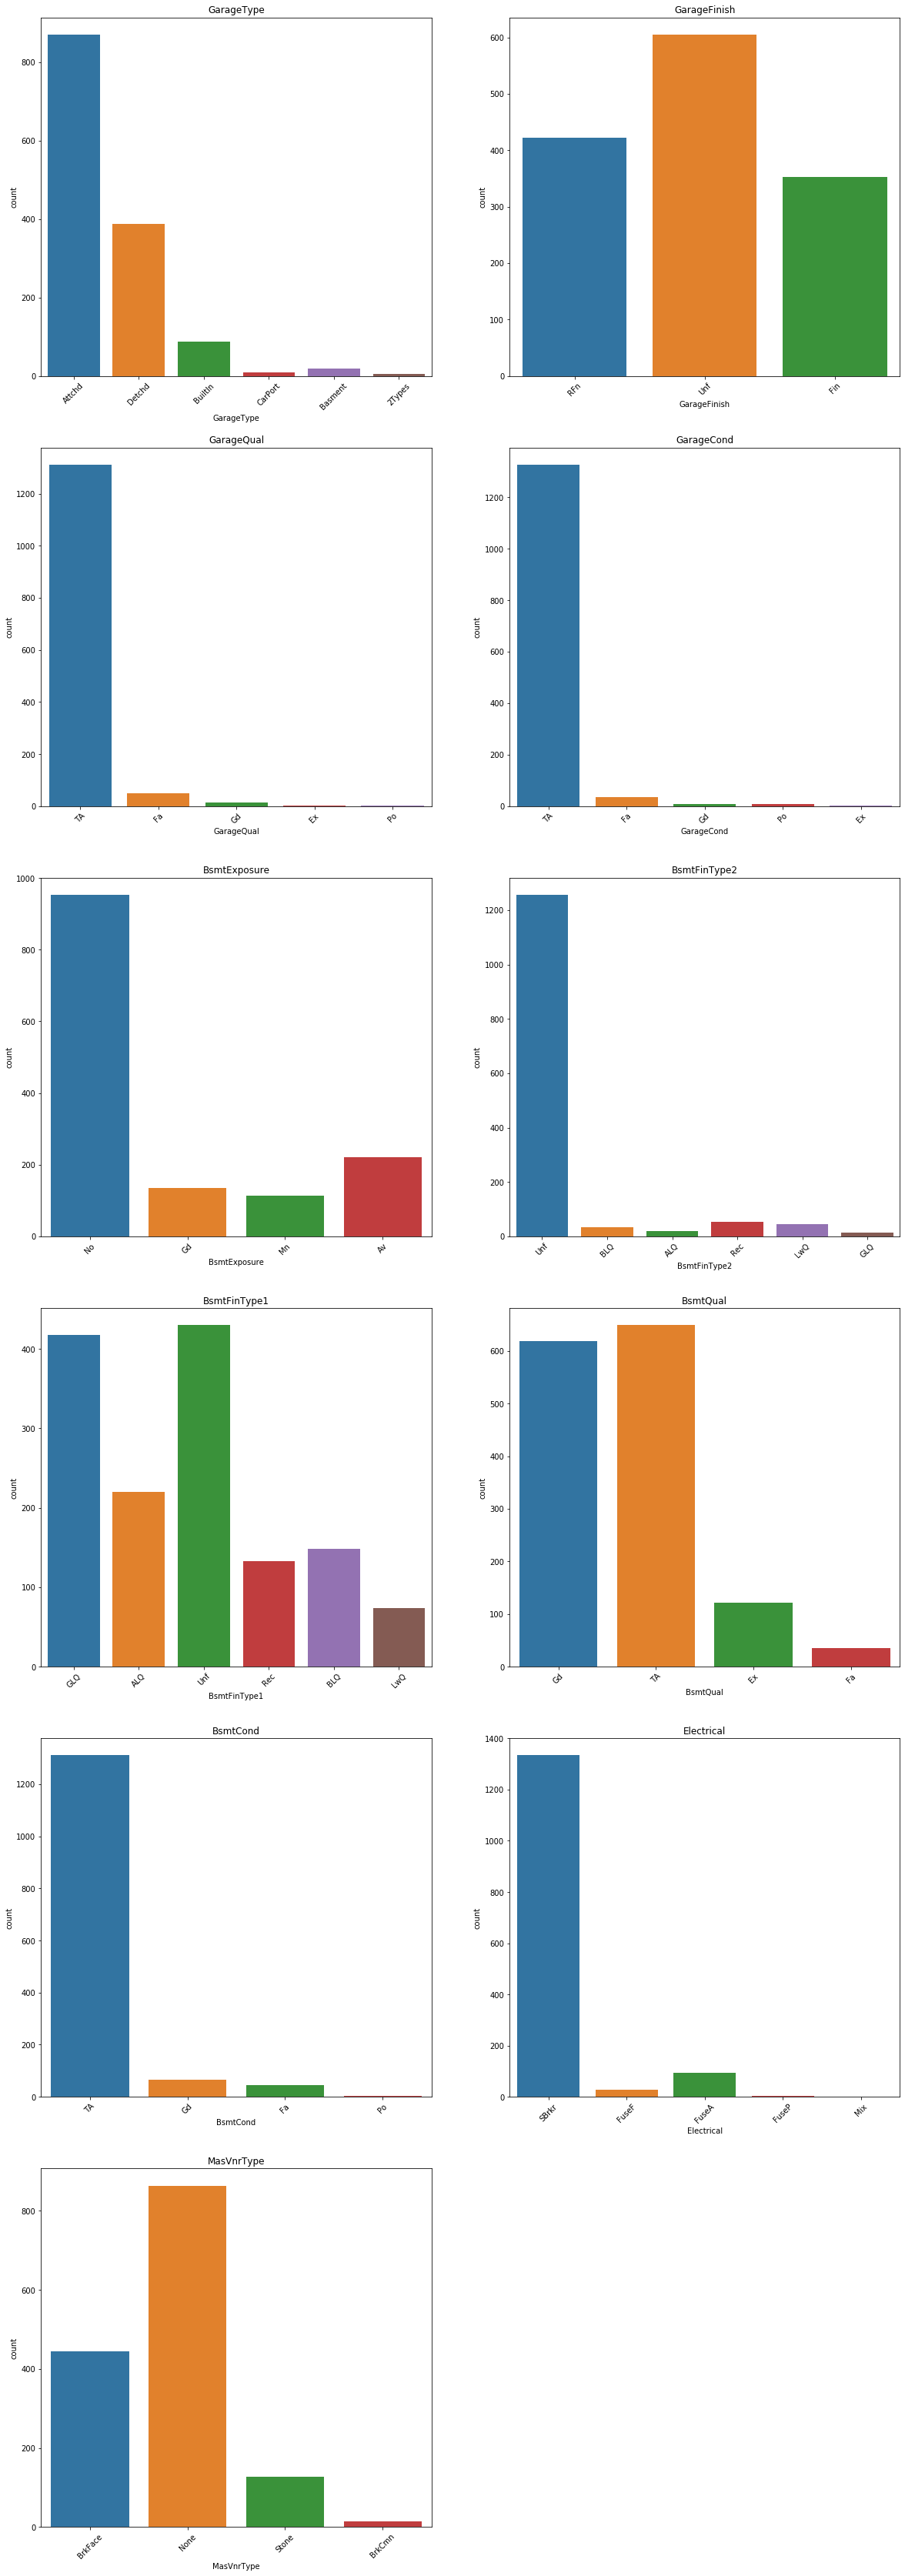

In [16]:
#Plotting them
plt.figure(figsize=(20,60))
for i in range(11):
    plt.subplot(6,2,i+1)
    sns.countplot(house_price[cat_columns[i]])
    plt.title(cat_columns[i])
    plt.xticks(rotation=45)

#### Imputting all garage columns NA values with "No Garage"

In [17]:
house_price.GarageType.fillna("No Garage",inplace=True)
house_price.GarageFinish.fillna("No Garage",inplace=True)
house_price.GarageQual.fillna("No Garage",inplace=True)
house_price.GarageCond.fillna("No Garage",inplace=True)

#### Imputting all basement columns NA values with "No Basement"

In [18]:
house_price.BsmtExposure.fillna("No Basement",inplace=True)
house_price.BsmtFinType2.fillna("No Basement",inplace=True)
house_price.BsmtFinType1.fillna("No Basement",inplace=True)
house_price.BsmtQual.fillna("No Basement",inplace=True)
house_price.BsmtCond.fillna("No Basement",inplace=True)

#### Imputting electrical column with "No electrical system"

In [19]:
house_price.Electrical.fillna("No Electrical System",inplace=True)

In [20]:
house_price.MasVnrType.fillna("None",inplace=True)
#If there is no Masonry veneer type then we can replace MASVnr area with zero
house_price.MasVnrArea.fillna(0,inplace=True)

In [21]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# house_price[cat_columns] = pd.DataFrame(imp.fit_transform(house_price[cat_columns]), columns=cat_columns)

## Plotting all categorical columns again to see if imputation is done correctly

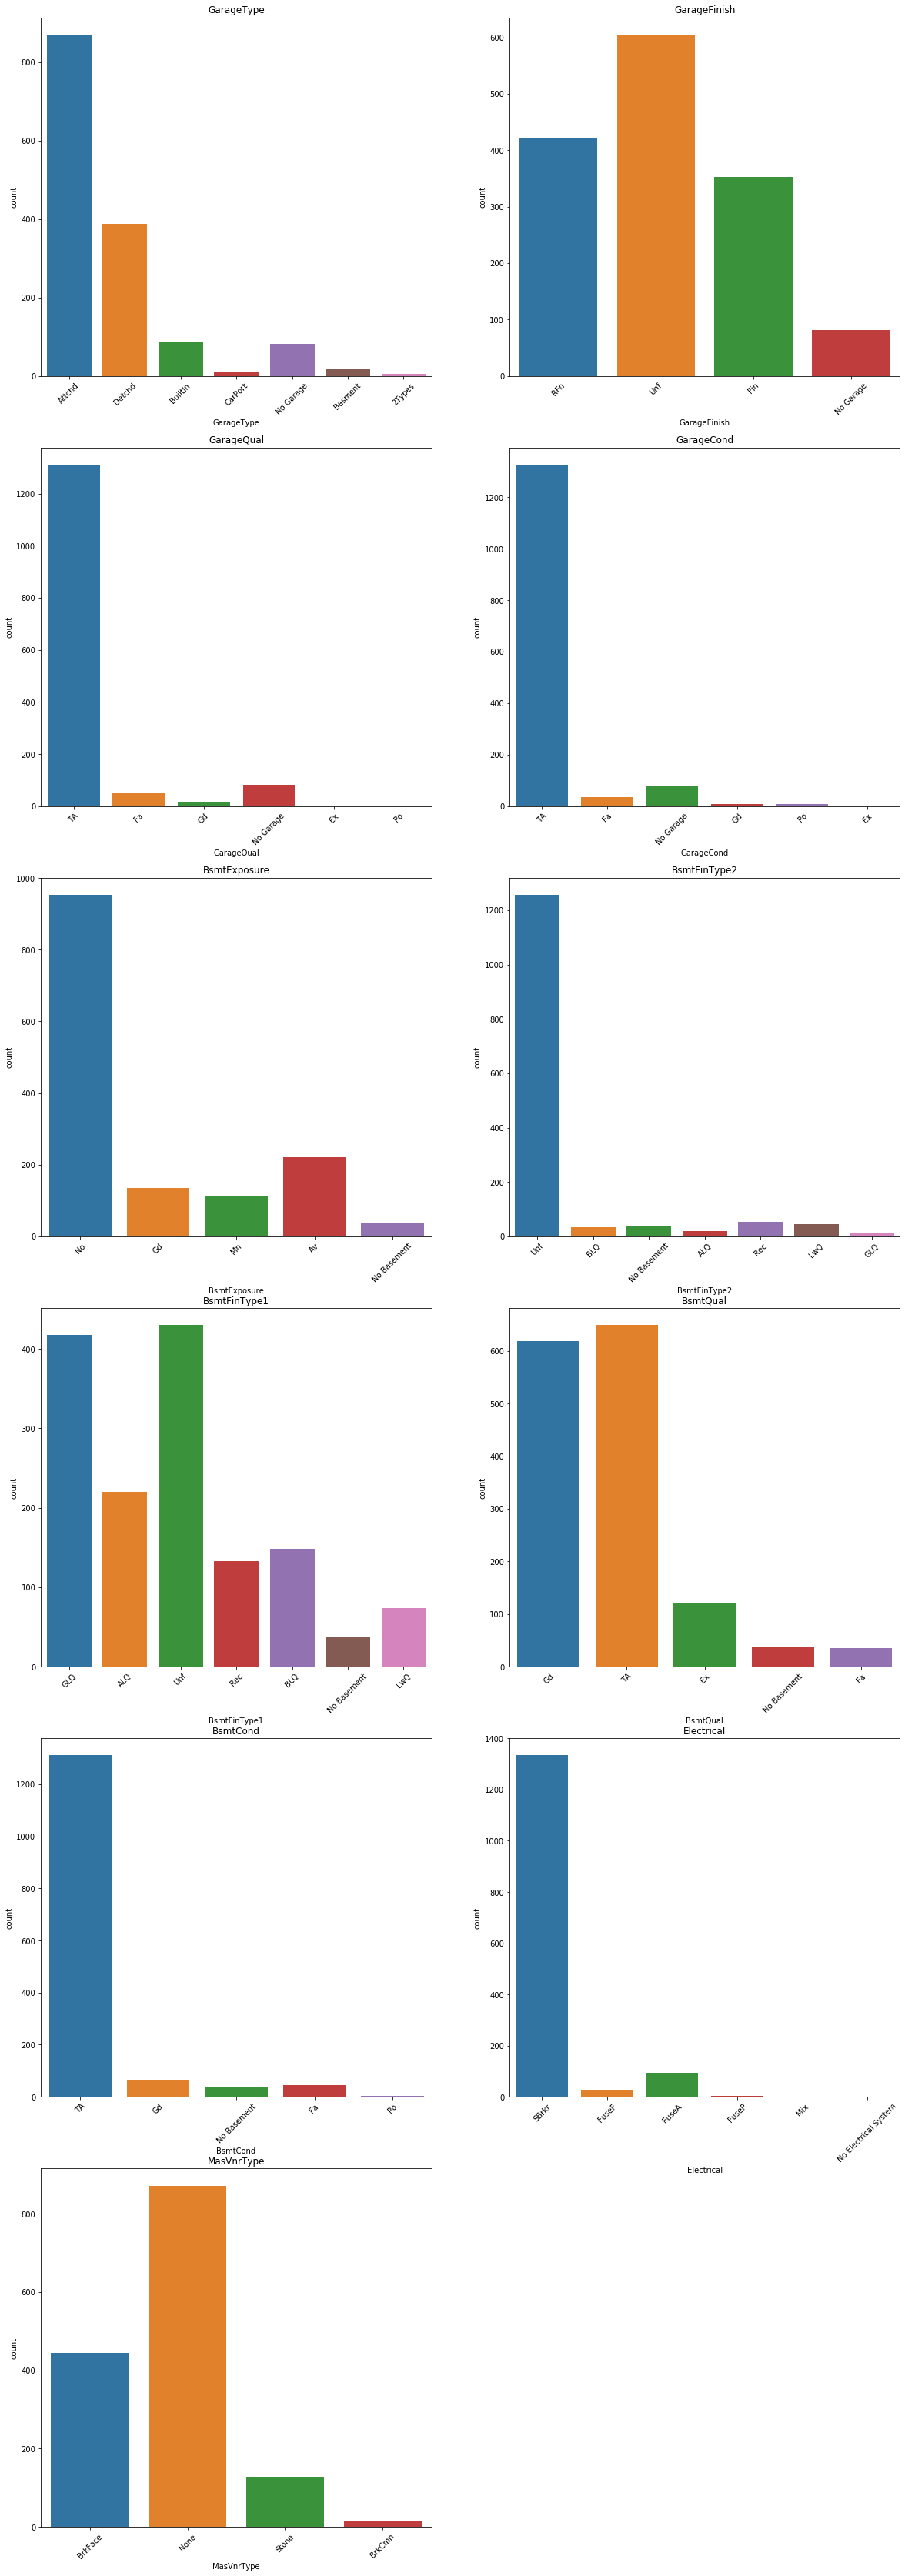

In [22]:
#Plotting them
plt.figure(figsize=(20,60))
for i in range(11):
    plt.subplot(6,2,i+1)
    sns.countplot(house_price[cat_columns[i]])
    plt.title(cat_columns[i])
    plt.xticks(rotation=45)

#### Checking for null values again

In [23]:
round(100 * (house_price.isnull().sum()/len(house_price.index)),2).sort_values(ascending=False).head(18)
# all null values have been imputed correctly

GarageYrBlt     5.55
SalePrice       0.00
ExterQual       0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.00
MasVnrArea      0.00
ExterCond       0.00
YearBuilt       0.00
Foundation      0.00
BsmtQual        0.00
BsmtCond        0.00
BsmtExposure    0.00
BsmtFinType1    0.00
BsmtFinSF1      0.00
BsmtFinType2    0.00
dtype: float64

#### Lets check few numerical column and their relation with Sales Price and how they might be affecting sale price and how much they are corelated

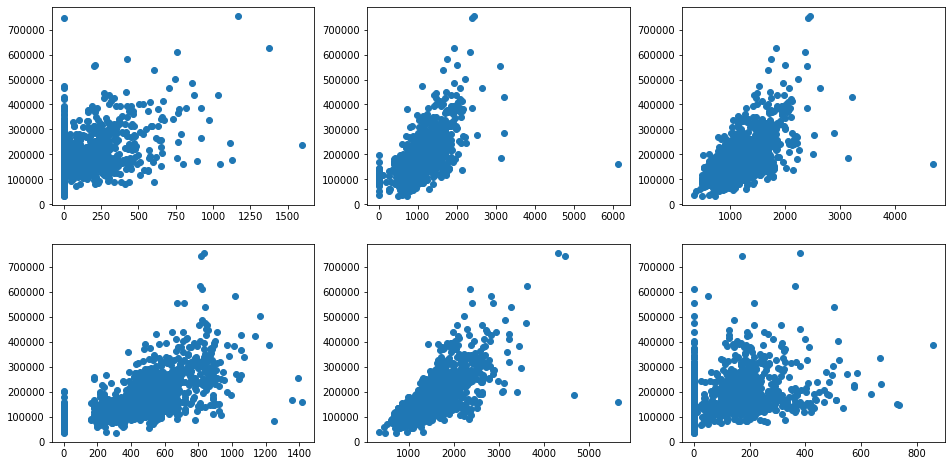

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)

### Lets check correlation between different numerical column and plot that value in Heatmap

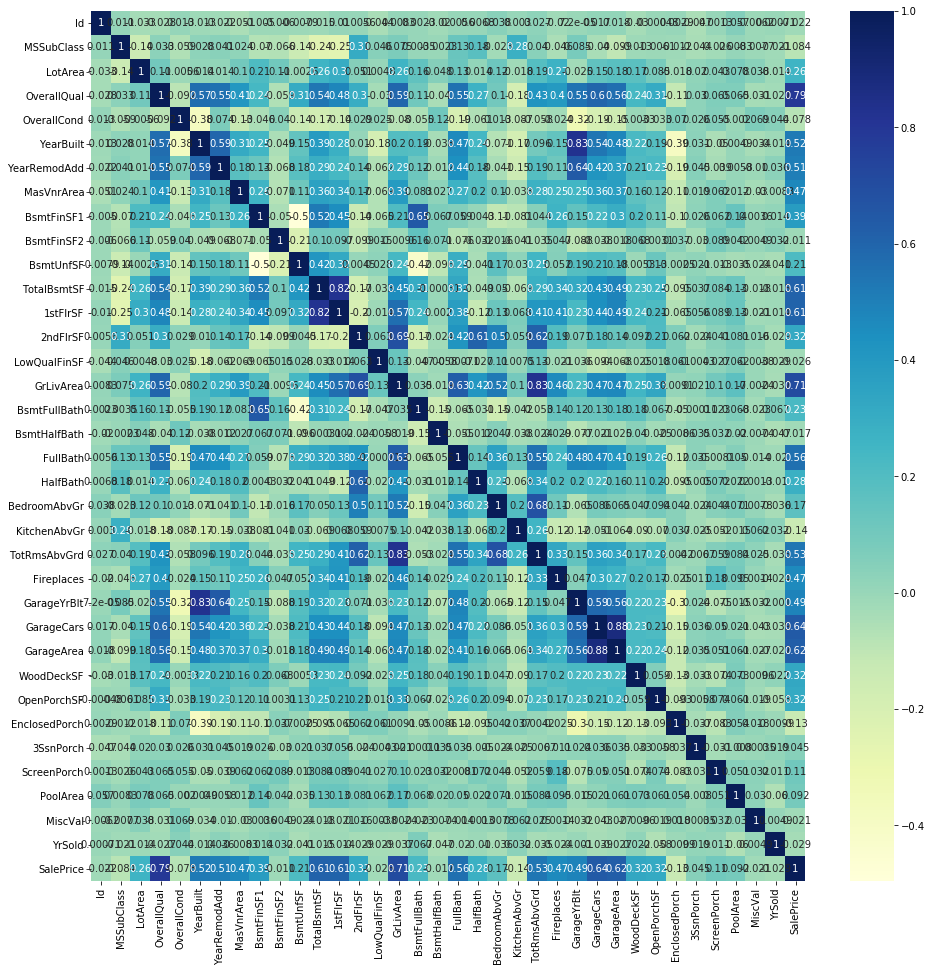

In [25]:

plt.figure(figsize=(16,16))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),  cmap="YlGnBu",annot=True)
plt.show()

 ## Dealing with Year fields   

In [26]:
pd.set_option('display.max_columns', None)
house_price[house_price['GarageYrBlt'].isnull()]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,No Garage,NaN,No Garage,0,0,No Garage,No Garage,N,0,0,0,0,0,0,0,2008,WD,AdjLand,82000
48,49,190,RM,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,No Garage,NaN,No Garage,0,0,No Garage,No Garage,N,0,0,102,0,0,0,0,2009,New,Partial,113000
78,79,90,RL,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,No Garage,NaN,No Garage,0,0,No Garage,No Garage,Y,0,0,0,0,0,0,0,2010,WD,Normal,136500
88,89,50,C (all),8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,No Garage,NaN,No Garage,0,0,No Garage,No Garage,N,0,0,156,0,0,0,0,2009,ConLD,Abnorml,85000
89,90,20,RL,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,No Garage,NaN,No Garage,0,0,No Garage,No Garage,Y,0,0,0,0,0,0,0,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,5250,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,No Garage,NaN,No Garage,0,0,No Garage,No Garage,Y,0,54,20,0,0,0,0,2008,WD,Normal,122000
1407,1408,20,RL,8780,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,No Garage,NaN,No Garage,0,0,No Garage,No Garage,Y,0,0,0,0,0,0,0,2009,WD,Normal,112000
1449,1450,180,RM,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,No Garage,NaN,No Garage,0,0,No Garage,No Garage,Y,0,0,0,0,0,0,0,2006,WD,Abnorml,92000
1450,1451,90,RL,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,No Garage,NaN,No Garage,0,0,No Garage,No Garage,Y,32,45,0,0,0,0,0,2009,WD,Normal,136000


#### Imputting Garage Year Built as current year value, as we know that Garageyrblt NA means that there is no Garage thus year built is not appliable and hence when we will finally calculate number of years of Garage Built it will come out to be zero

In [27]:
house_price.GarageYrBlt.fillna(pd.datetime.now().year,inplace=True) #Impute it with present year

In [28]:
from datetime import date
# creating the date object of today's date
current_date = date.today() 
# printing the current date

house_price['YearBuilt_Old'] = pd.datetime.now().year-house_price.YearBuilt
house_price['YearRemodAdd_Old'] = pd.datetime.now().year-house_price.YearRemodAdd
house_price['GarageYrBlt_Old'] = pd.datetime.now().year-house_price.GarageYrBlt
house_price['YrSold_Old'] = pd.datetime.now().year-house_price.YrSold
house_price[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
#
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
615,1963,1963,1963.0,2010,57,57,57.0,10
940,1976,1976,1976.0,2006,44,44,44.0,14
56,1999,2000,1999.0,2009,21,20,21.0,11
1428,1940,1992,1940.0,2010,80,28,80.0,10
547,1970,1970,1987.0,2007,50,50,33.0,13
419,1968,1968,1968.0,2010,52,52,52.0,10
705,1930,1950,2020.0,2010,90,70,0.0,10
184,1908,1991,1986.0,2006,112,29,34.0,14
37,1954,1990,1954.0,2009,66,30,66.0,11
98,1920,1950,1920.0,2010,100,70,100.0,10


In [29]:
# Dropping actual year columns

house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

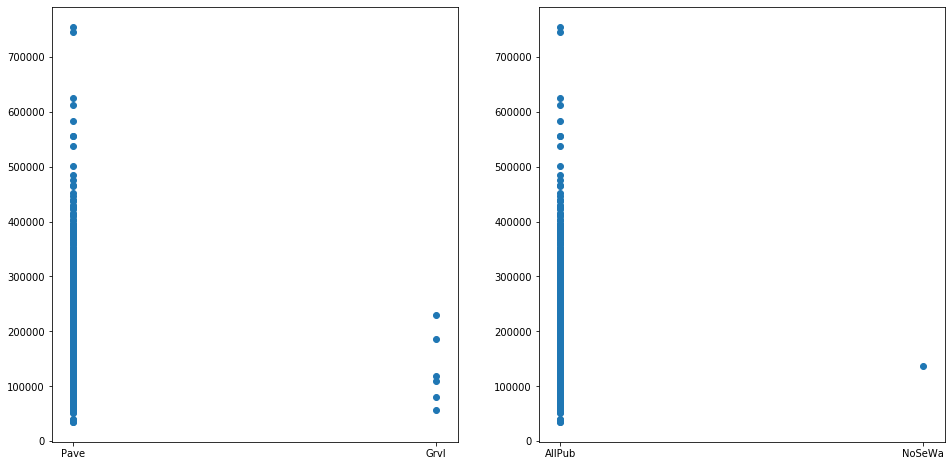

In [30]:
# Analysing street and utilities column
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(house_price['Street'],house_price.SalePrice)
plt.subplot(1,2,2)
plt.scatter(house_price['Utilities'],house_price.SalePrice)

#### As per the analysis 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns

As per the analysis 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns.
'Id' column is also of no use for our analysis hence dropping ID column as well

In [31]:
house_price = house_price.drop(['Street','Utilities','Id'],axis='columns')

In [32]:
house_price.shape

(1460, 71)

In [33]:
#Creating list of numerical and categorical columns
CatCols = []
NumCols = []

for col in list(house_price):
    if house_price[col].dtypes == 'object':
        CatCols.append(col)  
    else:
        NumCols.append(col)
print('Categorical columns:\n',CatCols)

print('Numerical columns:\n',NumCols)

Categorical columns:
 ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'YearBuilt_Old', 'YearRe

## Outlier analysis for numberical variables

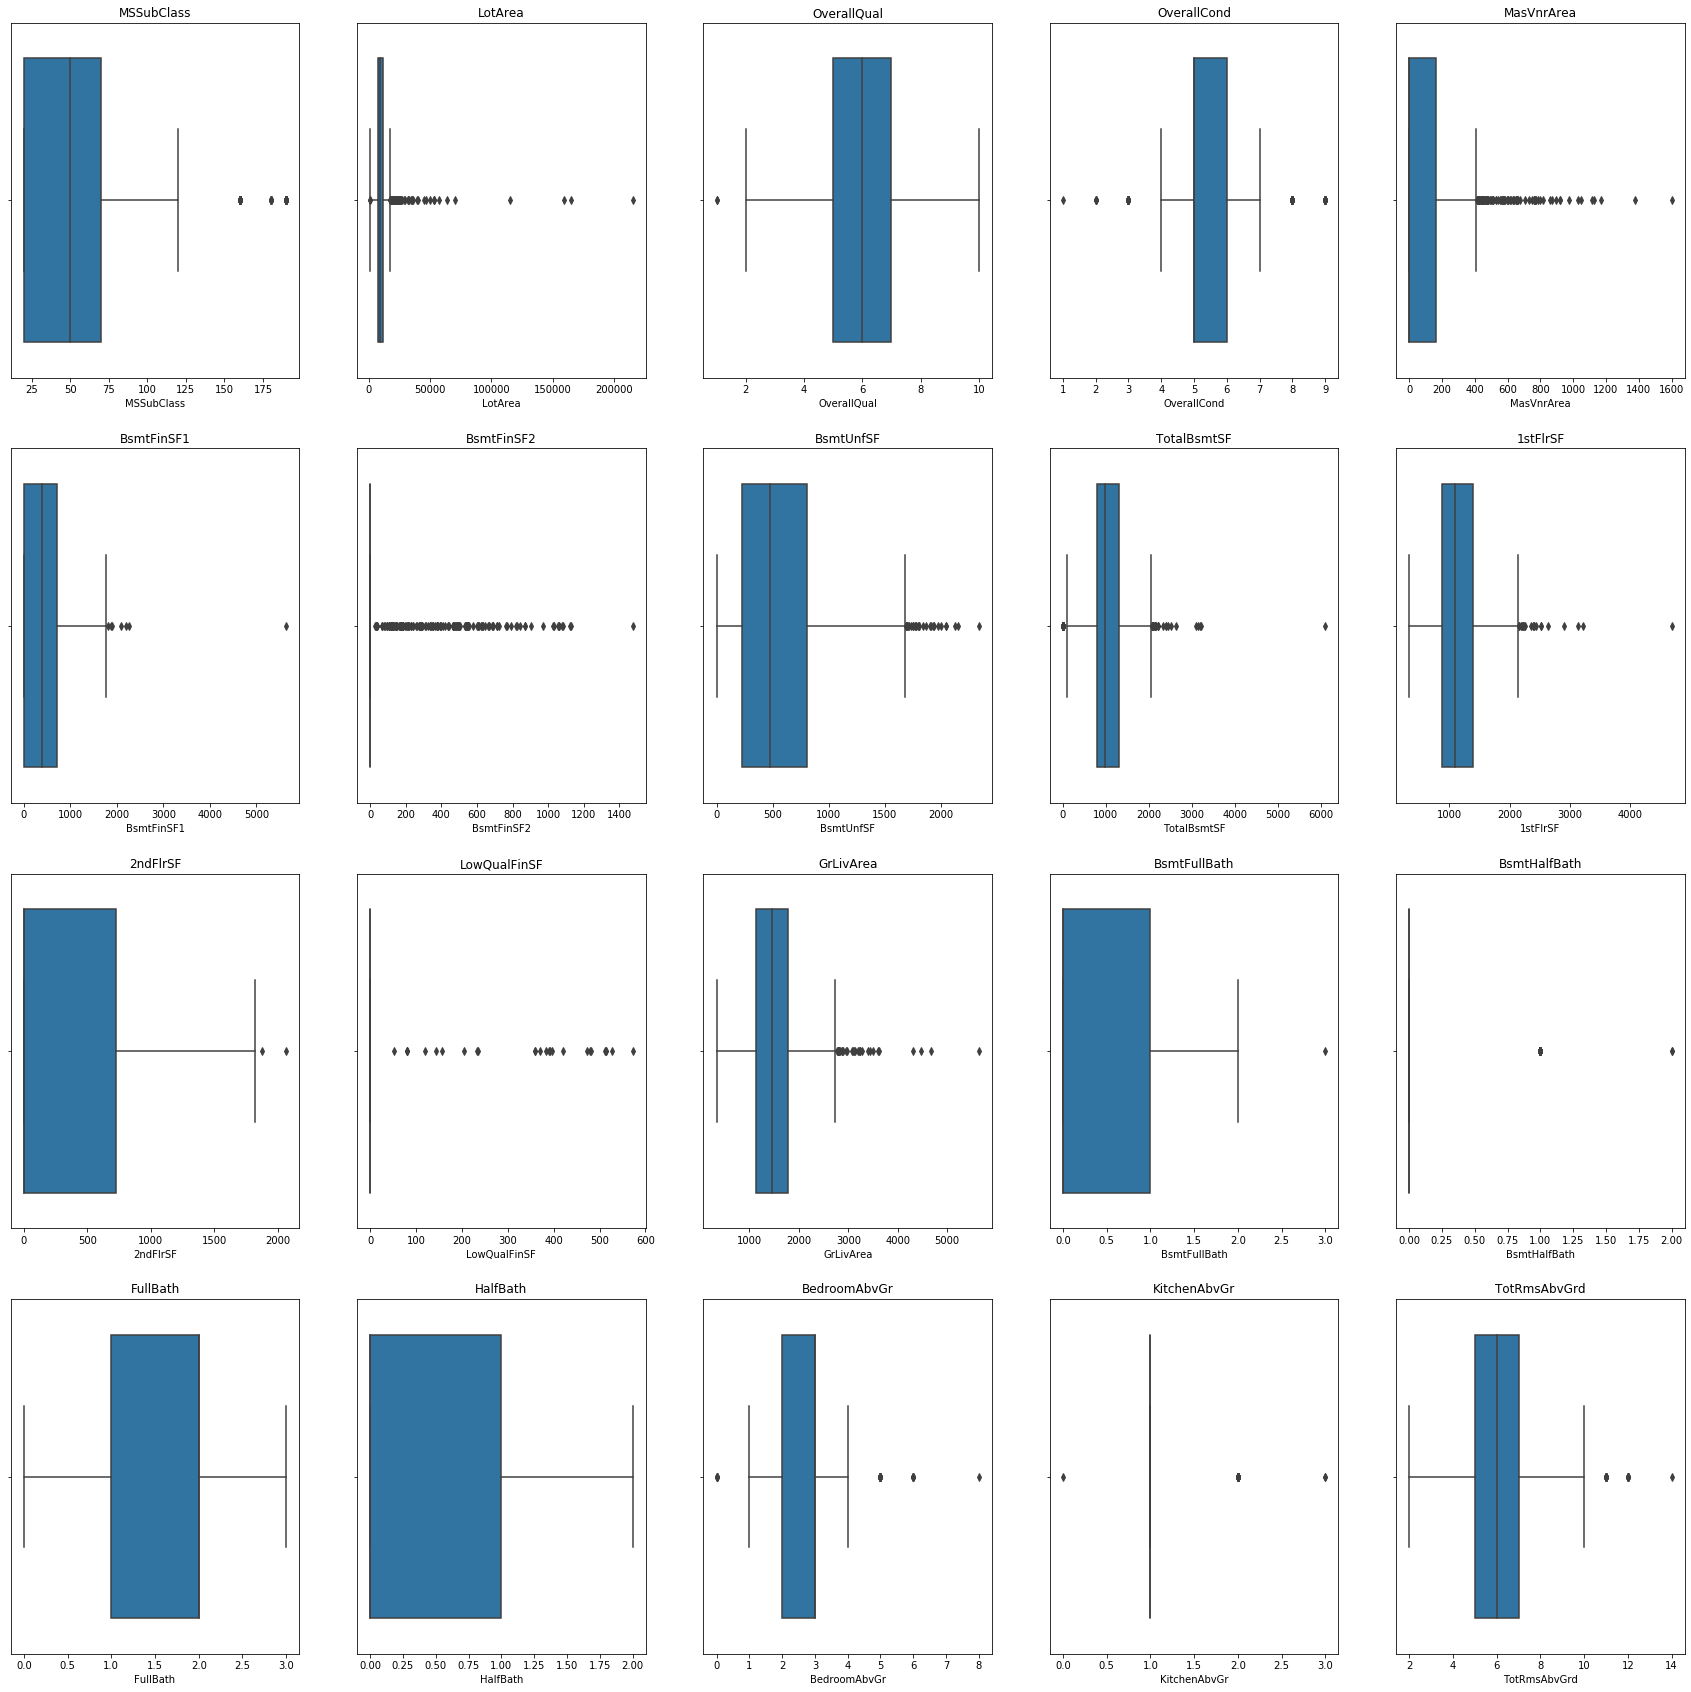

In [34]:
plt.figure(figsize=(30,30))
for i in range(20):
    plt.subplot(4,5,i+1)
    sns.boxplot(house_price[NumCols[i]])
    plt.title(NumCols[i])

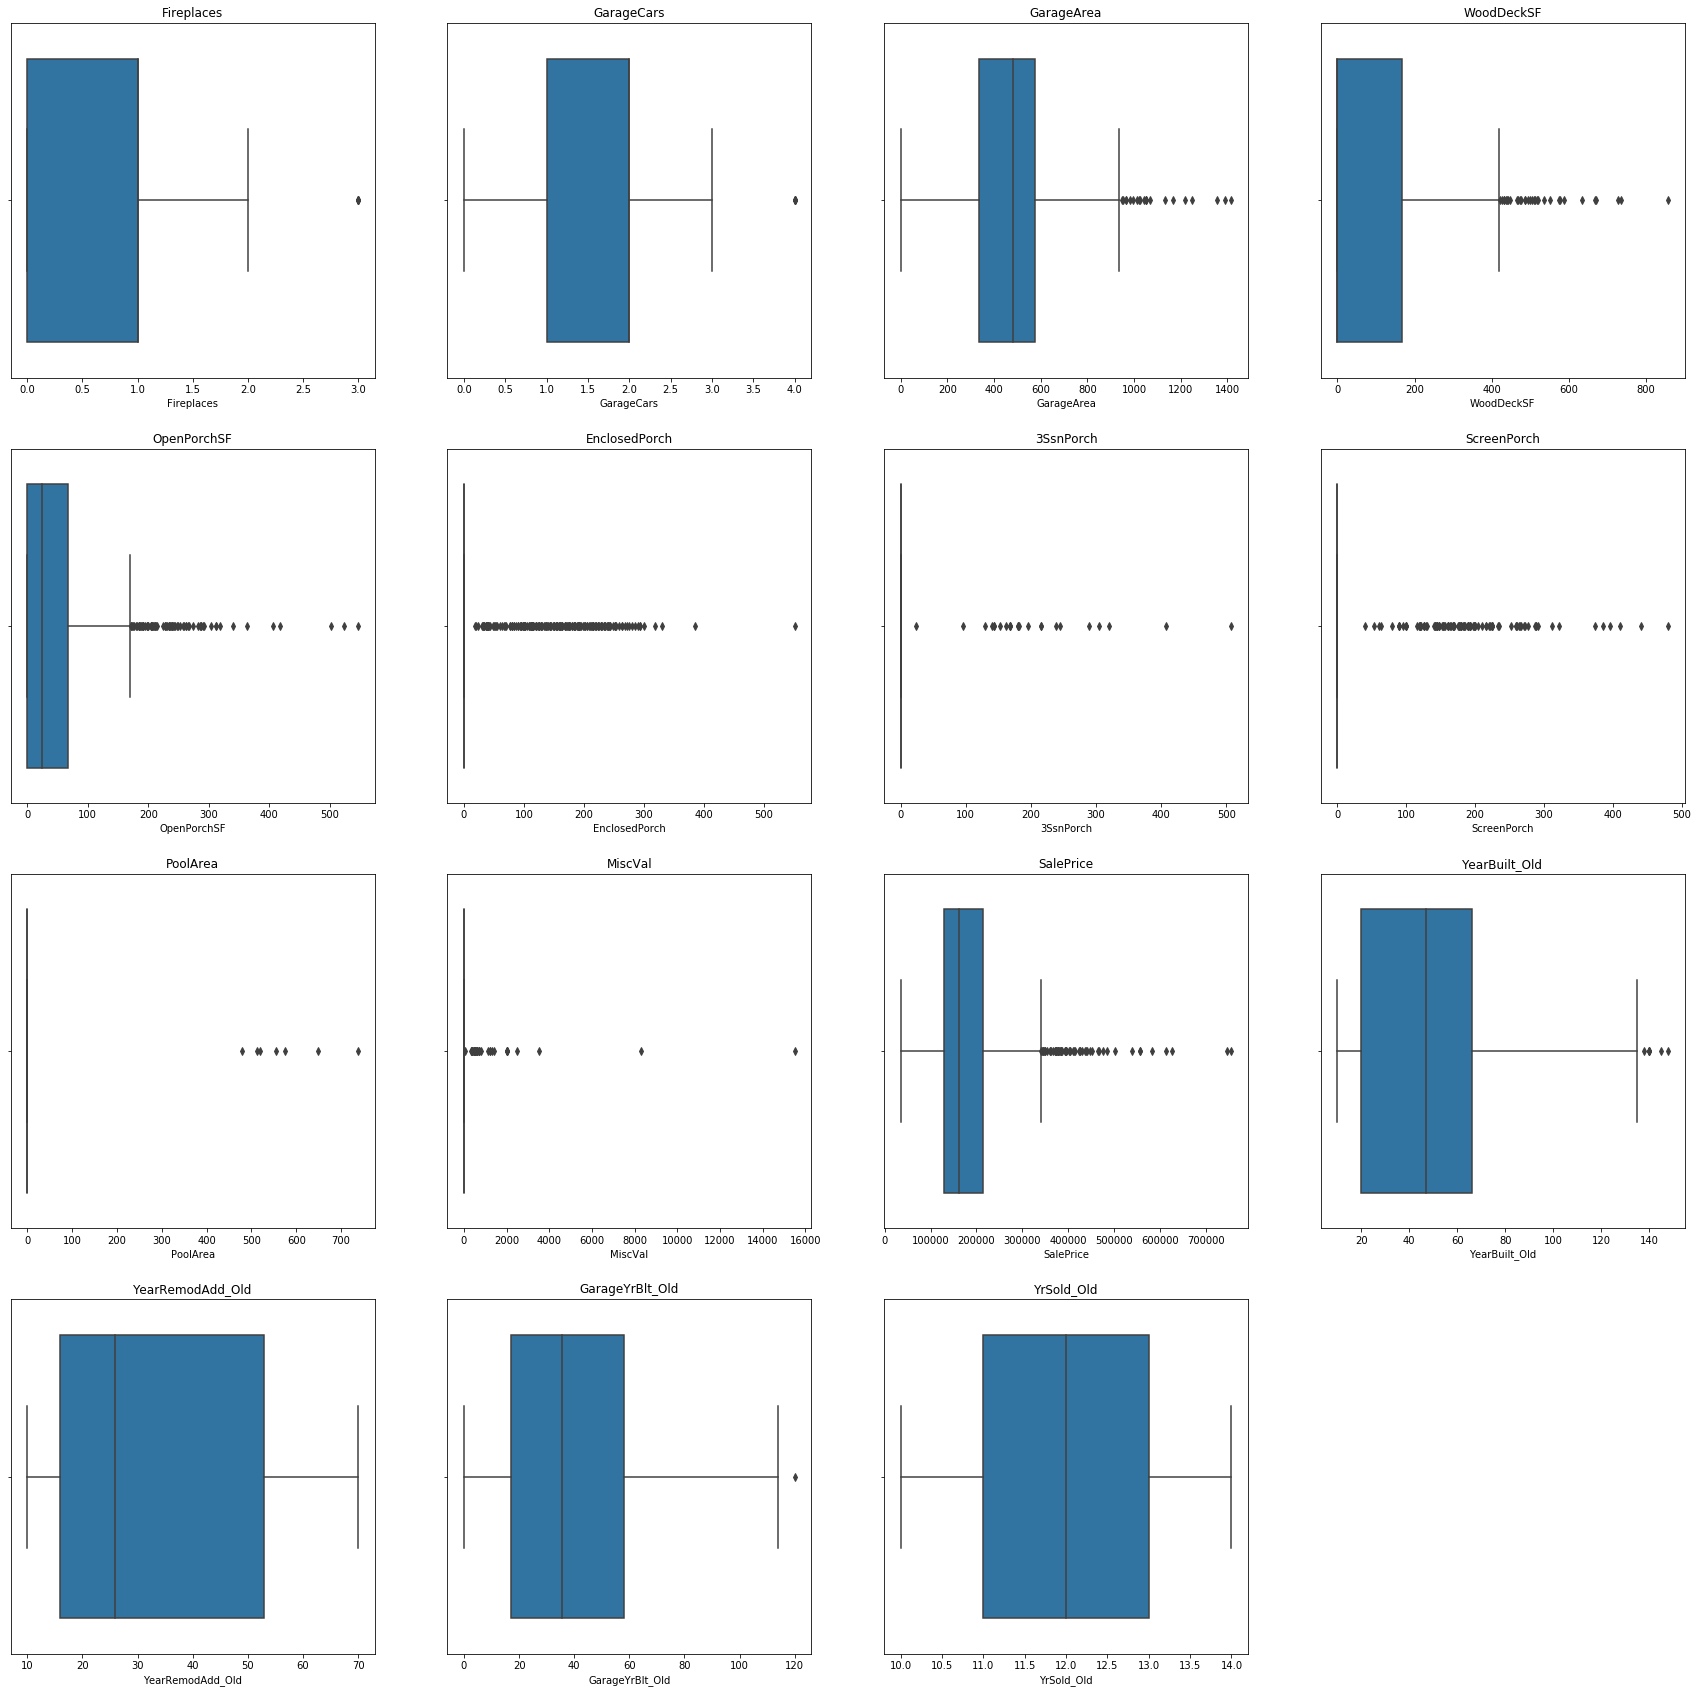

In [35]:
plt.figure(figsize=(30,30))
for i in range(20,35):
    plt.subplot(4,4,i-19)
    sns.boxplot(house_price[NumCols[i]])
    plt.title(NumCols[i])

Though the outliers are genuine, they represent high values to represent high price. If we choose to go for outlier treatment with capping or deletion we will losng some critical information, and the results we will get will not be very reliable, hence we can skip outlier treatment .
Though I tried outlier treatment and checked the results the accuracy achieved was upto 92%, but still I will compromise on high accuracy.

In [36]:
house_price.shape

(1460, 71)

In [37]:

house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


### Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

As discussed in the session for this assignment, it was told that not all columns will be eligile for dummy variable creation for all the columns where we observe some sequence we should convert them to a specific values

In [38]:
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [39]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4.0,3.0,1.0,6.0,1.0,4,1,3,2.0,3.0,3.0,2,3
1,0,2,4.0,3.0,4.0,5.0,1.0,4,1,2,2.0,3.0,3.0,2,3
2,0,3,4.0,3.0,2.0,6.0,1.0,4,1,3,2.0,3.0,3.0,2,0
3,0,2,3.0,4.0,1.0,5.0,1.0,3,1,3,1.0,3.0,3.0,2,0
4,0,3,4.0,3.0,3.0,6.0,1.0,4,1,3,2.0,3.0,3.0,2,0


## Creating dummy variables

In [40]:
dummy_col = pd.get_dummies(house_price[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_price = pd.concat([house_price,dummy_col],axis='columns')

house_price = house_price.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

## Transformation - Checking data distribution for Target variable

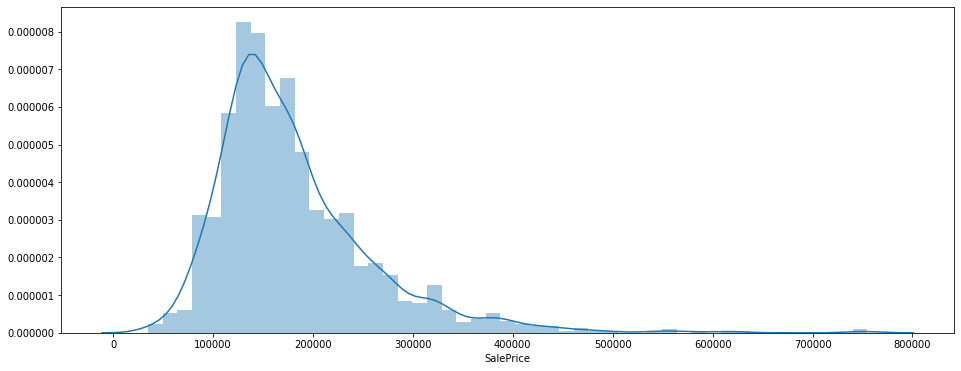

In [41]:
plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

As we can see from the above that the sales price variable distribution in not following gaussian curve and it is highly skewed, we need to apply some form of transformation to make data more normalized. So we will make it more gaussian in next section.


## Train Test Split

In [42]:
Y = house_price['SalePrice'] #Keeping target variable in Y
X = house_price.drop(['SalePrice'],axis= 1) # Keeping all other independent feature in X
X.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No Electrical System,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,3,0,7,5,196.0,3,2,4.0,3.0,1.0,6.0,706,1.0,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,2.0,2,548,3.0,3.0,0,61,0,0,0,0,0,17,17,17.0,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,0,6,8,0.0,2,2,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,2.0,2,460,3.0,3.0,298,0,0,0,0,0,0,44,44,44.0,13,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0

In [43]:
#Libraries for model building
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=42)

In [44]:
df_test.shape

(438, 197)

## Scaling

In [45]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 197 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(10), int64(40), uint8(147)
memory usage: 780.0 KB


In [46]:

num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [47]:
df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No Electrical System,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,-0.868006,-0.031106,3,0,0.636468,0.391626,1.061006,2,2,3.0,3.0,1.0,1.0,-0.971407,1.0,-0.280483,1.647353,0.546680,3,1,1.316609,-0.802940,-0.120373,0.287742,-0.814958,-0.247791,0.768438,-0.759102,0.134113,-0.212426,2,0.279381,0.594634,1.0,0.297954,0.254644,3.0,3.0,0.003763,-0.716106,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,-0.094307,50,50,50.0,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1452,2.885732,-0.624789,3,0,-0.822194,-0.508937,-0.144469,2,2,4.0,3.0,4.0,6.0,0.218347,1.0,-0.280483,-1.281026,-1.145636,3,1,-0.250050,-0.802940,-0.120373,-0.861096,1.111135,-0.247791,-1

### Spliting the dependent and independent variable

In [48]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [49]:
y_test = df_test.pop('SalePrice')
X_test = df_test

### Using Power Transformation for making Target Variable - sales price more Gaussian

In [50]:
## We are using PowerTransformer to perform a Yeo-Johnson power transformation on our X-data
## in order to ensure that our features are normally distributed. 
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
## Here we are doing the same thing, but for the dependent variable 'SalePrice' exclusively
pt = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame
 
y_train = pt.fit_transform(y_train.to_numpy().reshape(-1,1))
y_test = pt.fit_transform(y_test.to_numpy().reshape(-1,1))

In [51]:
y_train.shape

(1021, 1)

## See how a skewed data is converted to more normalized or Gaussian form

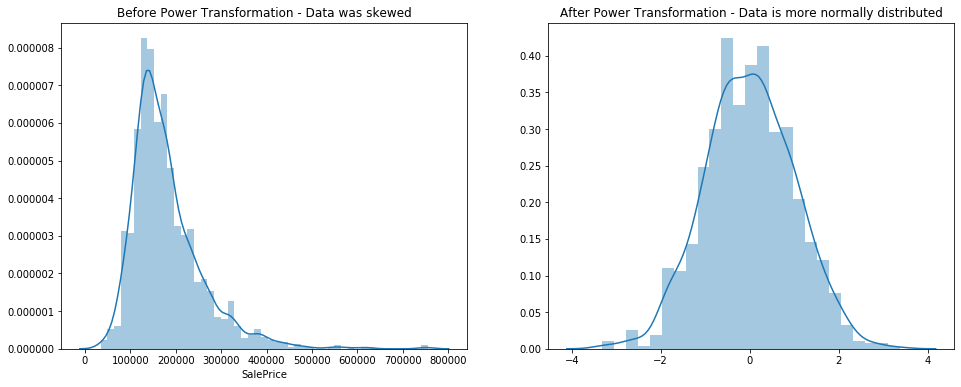

In [52]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Before Power Transformation - Data was skewed")
sns.distplot(house_price['SalePrice'])
plt.subplot(1,2,2)
plt.title("After Power Transformation - Data is more normally distributed")
sns.distplot(y_train)
plt.show()

## Model Building and Evaluation

In [53]:

len(X_train.columns)

196

In [54]:
X_train

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No Electrical System,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,-0.868006,-0.031106,3,0,0.636468,0.391626,1.061006,2,2,3.0,3.0,1.0,1.0,-0.971407,1.0,-0.280483,1.647353,0.546680,3,1,1.316609,-0.802940,-0.120373,0.287742,-0.814958,-0.247791,0.768438,-0.759102,0.134113,-0.212426,2,0.279381,0.594634,1.0,0.297954,0.254644,3.0,3.0,0.003763,-0.716106,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,50,50,50.0,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1452,2.885732,-0.624789,3,0,-0.822194,-0.508937,-0.144469,2,2,4.0,3.0,4.0,6.0,0.218347,1.0,-0.280483,-1.281026,-1.145636,3,1,-0.250050,-0.802940,-0.120373,-0.861096,1.111135,-0.247791,-1.068975,-0.759102,-1

In [55]:
X_train = X_train.fillna(X_train.mean())
# y_train_pt = np.nan_to_num(y_train_pt)
X_train
X_test = X_test.fillna(X_test.mean())

### Now using RFE lets try to to find the optimal number of feature
Note : I cannot use RFE with GridSearchCV as 196 variable with 5 folds will create 980 fit and it will take more then 1 Hour to get the result so i am using RFE directly¶

In [56]:
lm  = LinearRegression()
from sklearn.feature_selection import RFE
rfe = RFE(lm,75) #Recusrsive Feature Elimination with 75 features and LR object
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=75)

In [57]:
#Creating a dataframe with name of column, RFE Support and ranking
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [58]:
#Filtering the cols where RFE support is True...75 columns

rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['OverallQual',
 'OverallCond',
 'BsmtQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenQual',
 'Fireplaces',
 'GarageArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotConfig_CulDSac',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_PosN',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'RoofMatl_CompShg',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Wd Sdng',
 

#### Choosing only RFE Selected features and updating X_train and X_test columns

In [59]:
X_train = X_train[rfe_sel_columns]
X_train = X_train.fillna(X_train.mean())
X_test = X_test[rfe_sel_columns]

In [60]:
X_train.shape

(1021, 75)

## Lasso Regression Model
Lets try first with the Lasso regression model

In [61]:
# We are selecting alpha value as 0.001 for our initial model building
lm = Lasso(alpha=0.001, random_state = 42)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8821385332052926
0.8990120902476462


As we can see that initial Train and test accurancy is 88.21% and 89.90 % and since there is no major differnce between train and test accuracy, we can say that there are no sign of overfitting.

### Hyperparameter Tuning:
Now we will try to tune the hyperparameter so as to get optimal value of alpha

In [62]:
folds = 5 # 5 Fold cross validation 

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]} #Values of different hyperparameters 

model = Lasso() #Initialising Lasso object

#Hyperparameter tuning using GridSearchCV
model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [63]:
#Interpreting the GridSearchCV Results 
cv_result = pd.DataFrame(model_cv.cv_results_) #Converting the results into a DataFrame
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043263,0.006506,0.002400,0.001960,0.0001,{'alpha': 0.0001},0.897837,0.565312,0.879286,0.907272,0.685049,0.786951,0.137700,3,0.922426,0.930281,0.923716,0.922282,0.924211,0.924583,0.002943
1,0.040993,0.006293,0.001896,0.002369,0.0010,{'alpha': 0.001},0.883775,0.550076,0.882008,0.893291,0.871103,0.816051,0.133174,1,0.881589,0.922109,0.879286,0.881215,0.887977,0.890435,0.016105
2,0.003125,0.006250,0.003125,0.006249,0.0100,{'alpha': 0.01},0.870403,0.542132,0.873716,0.872426,0.874977,0.806731,0.132308,2,0.846084,0.902696,0.843475,0.845110,0.848254,0.857124,0.022839
3,0.009377,0.007656,0.000000,0.000000,0.0500,{'alpha': 0.05},0.835463,0.543849,0.813037,0.808004,0.828784,0.765827,0.111440,4,0.799730,0.855382,0.788371,0.795838,0.798207,0.807506,0.024254
4,0.000000,0.000000,0.006252,0.007657,0.1000,{'alpha': 0.1},0.802355,0.581085,0.769915,0.770347,0.780776,0.740896,0.080767,5,0.756408,0.819967,0.754506,0.763805,0.761088,0.771155,0.024628


## Plotting Grid Search CV results
To interpret results in a more comprehandble ways we will now plot the above results so that we will get a good idea about Mean Train Score and Mean Test Score for different value of alpha

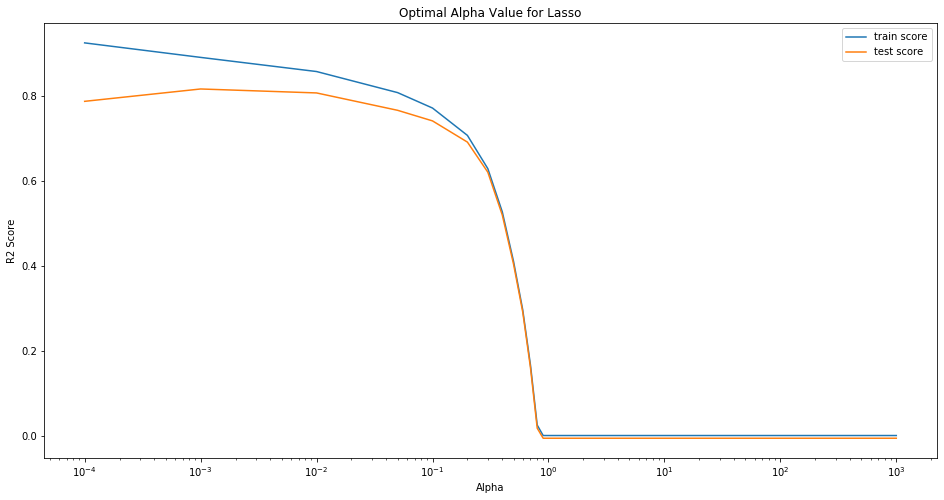

In [64]:
plt.figure(figsize=(16,8))
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score']) #Alpha on x axis and Mean Score on Y axis
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.title("Optimal Alpha Value for Lasso")
plt.show()

In [65]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

As we can see that best alpha value is 0.001, so we will build final model with 0.001 alpha value

In [66]:
lasso = Lasso(alpha=.001 , random_state = 42)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8821385332052926
0.8990120902476462


As we can see that r2_score for train and test is coming as 88.21% and 89.90%

In [67]:

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [68]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
45,Exterior1st_BrkComm,0.396091
23,Neighborhood_Crawfor,0.392858
40,RoofMatl_Metal,0.337284
43,RoofMatl_WdShake,0.294118
8,1stFlrSF,0.271862
1,OverallCond,0.265681
12,KitchenQual,0.264773
73,SaleCondition_Normal,0.206485
29,Condition1_Feedr,0.192175
31,Condition1_PosA,0.17648


In [69]:
lasso_coef

,Feature,Coef
0,OverallQual,[-1.9431378539175943]
1,OverallCond,0.265681
2,BsmtQual,0.0904022
3,BsmtFinSF1,0.14276
4,BsmtFinSF2,0.0571172
...,...,...
70,SaleType_ConLw,0
71,SaleType_Oth,-0
72,SaleCondition_Alloca,0
73,SaleCondition_Normal,0.206485


As we can see most of the coefficient in LAsso is converted to Zero, we can say that Lasso also helps in feature elimination

In [70]:
## Now checking if scoring method is changed to negative 

In [71]:
folds = 5 # 5 Fold cross validation 

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]} #Values of different hyperparameters 

model = Lasso() #Initialising Lasso object

#Hyperparameter tuning using GridSearchCV
model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
#Interpreting the GridSearchCV Results 
cv_result = pd.DataFrame(model_cv.cv_results_) #Converting the results into a DataFrame
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033085,0.005867,0.004599,0.001744,0.0001,{'alpha': 0.0001},-0.238107,-0.269479,-0.235615,-0.224083,-0.237340,-0.240925,0.015152,1,-0.200813,-0.199078,-0.198660,-0.203586,-0.205913,-0.201610,0.002763
1,0.028790,0.002991,0.004000,0.000001,0.0010,{'alpha': 0.001},-0.259896,-0.273505,-0.261089,-0.248876,-0.228656,-0.254404,0.015055,2,-0.233820,-0.209504,-0.234177,-0.236366,-0.237273,-0.230228,0.010443
2,0.008798,0.001600,0.004799,0.001602,0.0100,{'alpha': 0.01},-0.276311,-0.295368,-0.284680,-0.268765,-0.236314,-0.272288,0.020045,3,-0.263208,-0.232993,-0.262369,-0.266777,-0.270106,-0.259091,0.013336
3,0.011483,0.005357,0.000000,0.000000,0.0500,{'alpha': 0.05},-0.313366,-0.336825,-0.350462,-0.321769,-0.283295,-0.321143,0.022798,4,-0.313369,-0.283068,-0.318702,-0.322341,-0.324955,-0.312487,0.015215
4,0.009375,0.007654,0.006249,0.007654,0.1000,{'alpha': 0.1},-0.340406,-0.363468,-0.393931,-0.357679,-0.326747,-0.356446,0.022783,5,-0.360103,-0.315892,-0.354693,-0.357008,-0.365355,-0.350610,0.017723


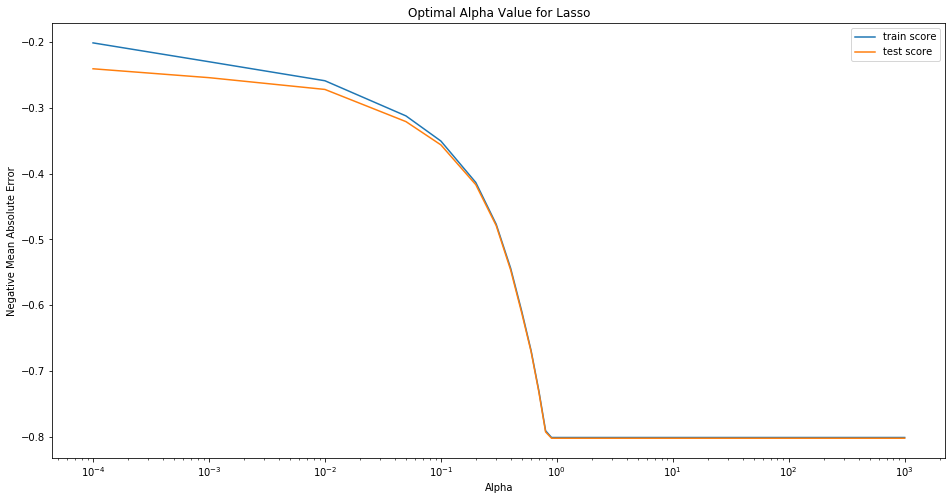

In [73]:
plt.figure(figsize=(16,8))
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score']) #Alpha on x axis and Mean Score on Y axis
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.title("Optimal Alpha Value for Lasso")
plt.show()

In [74]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [75]:
lasso = Lasso(alpha=.0001 , random_state = 42)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9211657226046195
0.8151730943269803


### As we can see that with scoring method Negative mean error the accuracy for train has increase to 92% but test accuracy has dropped to 81% and since this differnce is greater than 10% we will consider R2 as final scoring method and alpha as 0.001

### Ridge Regularisation Model
Now we will build a model with Ridge Regularisation Model

In [76]:
# For initial model building here also we will take alpha as 0.01
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9219421308036552
0.7870661202585449


As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score
Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [77]:

folds  = 5

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [78]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020945,0.006080,0.007085,4.550989e-03,0.0001,{'alpha': 0.0001},0.897685,0.571307,0.876892,0.908540,0.641812,0.779247,0.143113,27,0.923087,0.930526,0.924459,0.922934,0.924727,0.925146,0.002783
1,0.008593,0.003585,0.006398,4.077985e-03,0.0010,{'alpha': 0.001},0.897687,0.571306,0.877086,0.908514,0.645186,0.779956,0.142492,26,0.923084,0.930526,0.924455,0.922931,0.924724,0.925144,0.002784
2,0.010422,0.005790,0.000799,1.598835e-03,0.0100,{'alpha': 0.01},0.897610,0.571293,0.878773,0.908179,0.675275,0.786226,0.137368,25,0.922800,0.930525,0.924148,0.922657,0.924531,0.924932,0.002891
3,0.007923,0.005217,0.005922,5.189480e-03,0.0500,{'alpha': 0.05},0.896261,0.571187,0.883145,0.906046,0.757367,0.802801,0.127717,23,0.919146,0.930502,0.920215,0.919116,0.921818,0.922159,0.004286
4,0.005197,0.000747,0.002998,5.761645e-07,0.1000,{'alpha': 0.1},0.894327,0.570973,0.885856,0.903551,0.804835,0.811908,0.125506,22,0.914071,0.930442,0.914755,0.914186,0.917666,0.918224,0.006248


## Plotting Grid Search CV results
To interpret results in a more comprehandble ways we will now plot the above results so that we will get a good idea about Mean Train Score and Mean Test Score for different value of alpha

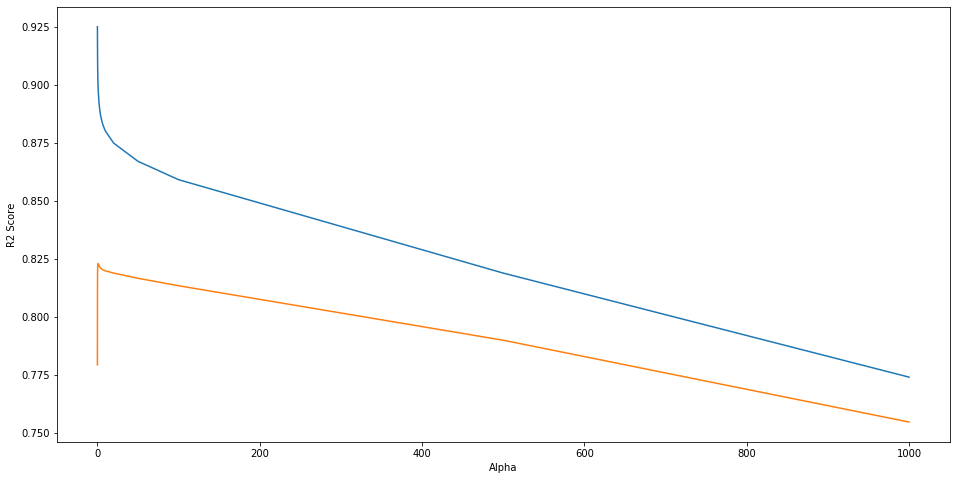

In [79]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [80]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.8}

As the best alpha score for ridge is coming as 4, we will build our model on alpha value as 4

In [81]:

ridge = Ridge(alpha = 4)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8826968340413447
0.8987167278643621


As we can see the value of train and test score is 88% and 89.87%, we can say there is no sign of overfitting and we can consider them as final result

In [82]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Feature','Coef']

In [83]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
45,Exterior1st_BrkComm,0.396091
23,Neighborhood_Crawfor,0.392858
40,RoofMatl_Metal,0.337284
43,RoofMatl_WdShake,0.294118
8,1stFlrSF,0.271862
1,OverallCond,0.265681
12,KitchenQual,0.264773
73,SaleCondition_Normal,0.206485
29,Condition1_Feedr,0.192175
31,Condition1_PosA,0.17648


From above we can conclude that Lasso helps in feature elimination as most of the feature coefficient were 0.
Final features selected by both Ridge and Lasso model is same and the weightge is also in same proportion.
Most important features are as below and all are positively related:
    - Exterior1st_BrkComm
    - Neighborhood_Crawfor
    - RoofMatl_Metal
    - RoofMatl_WdShake
    - 1stFlrSF
    - OverallCond
    - KitchenQual
    - SaleCondition_Normal
    - Condition1_Feedr
    - Condition1_PosA

## After compairing both the model we can see that the below Features are best explaining the DataSet
    - Exterior1st_BrkComm
    - Neighborhood_Crawfor
    - RoofMatl_Metal
    - RoofMatl_WdShake
    - 1stFlrSF


## And the best value for Alpha for Lasso is 0.001 and Ridge is 4

## Subjective Question 1 

### If alpha value of lasso is doubled

In [84]:
# Building model with alpha value 0.002
lasso = Lasso(alpha=.002 , random_state = 42)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8714283358711908
0.8952432747191325


In [85]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
23,Neighborhood_Crawfor,0.306116
1,OverallCond,0.272208
8,1stFlrSF,0.265735
12,KitchenQual,0.260246
60,Foundation_Stone,0.158767
31,Condition1_PosA,0.1513
3,BsmtFinSF1,0.151201
68,SaleType_CWD,0.145
20,Neighborhood_Blueste,0.143648
24,Neighborhood_Edwards,0.13804


### If alpha value of Ridge is doubled

In [86]:
ridge = Ridge(alpha = 8)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.87773861474159
0.8984059728100188


In [87]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
23,Neighborhood_Crawfor,0.306116
1,OverallCond,0.272208
8,1stFlrSF,0.265735
12,KitchenQual,0.260246
60,Foundation_Stone,0.158767
31,Condition1_PosA,0.1513
3,BsmtFinSF1,0.151201
68,SaleType_CWD,0.145
20,Neighborhood_Blueste,0.143648
24,Neighborhood_Edwards,0.13804


## Subjective Question 3

In [88]:
X_train.shape

(1021, 75)

### Creating another dataset for train and test, so that we may not impact original X_train and X_test

In [89]:
df_top_train = X_train.copy()
df_top_train.shape

(1021, 75)

In [90]:
df_top_test = X_test.copy()
df_top_test.shape

(438, 75)

Below are the top 5 contributing factors:
    
    -Exterior1st_BrkComm
    - Neighborhood_Crawfor
    - RoofMatl_Metal
    - RoofMatl_WdShake
    - 1stFlrSF


As per discussion on Discussion Forum, we need to delete not just the top contributing factors but all the columns that are created by one ot encoding from parent attributes

In [91]:
df_top_train.columns

Index(['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'Fireplaces', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_CulDSac', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_PosN',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofMatl_CompShg',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_Plywood'

In [92]:
    df_top_train.drop(['Neighborhood_Crawfor','OverallCond','1stFlrSF','Exterior1st_BrkComm',
           'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_Plywood',
           'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing','Neighborhood_Blueste',
            'Neighborhood_BrDale','Neighborhood_ClearCr','Neighborhood_Edwards','Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
            'Neighborhood_StoneBr','Neighborhood_Veenker', 'RoofMatl_CompShg',
           'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
           'RoofMatl_WdShake', 'RoofMatl_WdShngl'], axis = 1, inplace = True)

In [93]:
df_top_test.drop(['Neighborhood_Crawfor','OverallCond','1stFlrSF','Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing','Neighborhood_Blueste',
        'Neighborhood_BrDale','Neighborhood_ClearCr','Neighborhood_Edwards','Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
        'Neighborhood_StoneBr','Neighborhood_Veenker', 'RoofMatl_CompShg',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl'], axis = 1, inplace = True)

In [94]:
df_top_train.head()

,OverallQual,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,KitchenQual,Fireplaces,GarageArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_PosN,HouseStyle_2.5Fin,HouseStyle_2.5Unf,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_PConc,Foundation_Stone,Heating_Grav,Heating_OthW,Electrical_No Electrical System,Functional_Maj2,Functional_Mod,Functional_Sev,Functional_Typ,SaleType_CWD,SaleType_Con,SaleType_ConLw,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
135,0.636468,3.0,-0.971407,-0.280483,1.647353,0.546680,1,-0.802940,-0.120373,0.287742,2,0.594634,0.254644,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1452,-0.822194,4.0,0.218347,-0.280483,-1.281026,-1.145636,1,-0.802940,-0.120373,-0.861096,2,-0.942382,0.230647,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
762,0.636468,4.0,-0.919206,-0.280483,0.362819,-0.678405,1,0.972627,-0.120373,0.033491,3,-0.942382,0.657783,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
932,2.095130,5.0,-0.971407,-0.280483,2.997013,1.890249,1,-0.802940,-0.120373,0.707727,4,0.594634,1.492858,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
435,0.636468,4.0,-0.134012,1.994578,-1.123828,-0.582276,1,1.088277,-0.120373,0.248192,3,0.594634,0.350629,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [95]:
df_top_train.columns

Index(['OverallQual', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_PosN', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'Foundation_PConc', 'Foundation_Stone',
       'Heating_Grav', 'Heating_OthW', 'Electrical_No Electrical System',
       'Functional_Maj2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleCondition_Alloca', 'SaleCondition_

### Using Ridge Model

In [96]:
folds  = 5

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(df_top_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [97]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006399,0.001958,0.004000,0.000002,0.0001,{'alpha': 0.0001},0.871416,0.551019,0.851703,0.865206,0.854628,0.798794,0.124092,26,0.860927,0.911507,0.860134,0.863352,0.864856,0.872155,0.019748
1,0.007202,0.001594,0.003995,0.000006,0.0010,{'alpha': 0.001},0.871426,0.551012,0.851773,0.865203,0.854635,0.798810,0.124102,25,0.860927,0.911507,0.860134,0.863352,0.864856,0.872155,0.019748
2,0.009915,0.005785,0.001596,0.003193,0.0100,{'alpha': 0.01},0.871525,0.550936,0.852460,0.865175,0.854712,0.798962,0.124207,24,0.860926,0.911506,0.860132,0.863351,0.864855,0.872154,0.019748
3,0.006603,0.002158,0.004000,0.000003,0.0500,{'alpha': 0.05},0.871917,0.550583,0.855248,0.865053,0.855021,0.799564,0.124653,23,0.860900,0.911488,0.860083,0.863333,0.864833,0.872127,0.019753
4,0.001210,0.002419,0.012499,0.006250,0.1000,{'alpha': 0.1},0.872319,0.550119,0.858206,0.864909,0.855352,0.800181,0.125168,22,0.860831,0.911440,0.859950,0.863283,0.864770,0.872055,0.019767


In [98]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20}

In [99]:

ridge = Ridge(alpha = 20)
ridge.fit(df_top_train,y_train)

y_pred_train = ridge.predict(df_top_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(df_top_test)
print(r2_score(y_test,y_pred_test))

0.852324948616984
0.8778746555436929


In [100]:
_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_top_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
23,Condition1_RRNe,0.306116
1,BsmtQual,0.272208
8,LowQualFinSF,0.265735
12,GarageArea,0.260246
31,Exterior2nd_Plywood,0.1513
3,BsmtFinSF2,0.151201
20,Condition1_PosA,0.143648
24,Condition1_RRNn,0.13804
15,MSZoning_RL,0.128985
13,MSZoning_FV,0.098941


### Using Lasso model

In [101]:
folds = 5 # 5 Fold cross validation 

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]} #Values of different hyperparameters 

model = Lasso() #Initialising Lasso object

#Hyperparameter tuning using GridSearchCV
model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(df_top_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [102]:
#Interpreting the GridSearchCV Results 
cv_result = pd.DataFrame(model_cv.cv_results_) #Converting the results into a DataFrame
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021187,0.007328,0.004398,0.001019,0.0001,{'alpha': 0.0001},0.872419,0.549764,0.852776,0.865334,0.856581,0.799375,0.124993,2,0.860770,0.911329,0.860012,0.863205,0.864702,0.872004,0.019734
1,0.008994,0.002190,0.003798,0.000748,0.0010,{'alpha': 0.001},0.877959,0.534976,0.863790,0.865331,0.861100,0.800631,0.132954,1,0.854951,0.905830,0.853886,0.857086,0.858565,0.866063,0.019950
2,0.006796,0.000979,0.003398,0.001496,0.0100,{'alpha': 0.01},0.865552,0.542336,0.865019,0.853105,0.860545,0.797312,0.127566,3,0.831974,0.890128,0.829906,0.834368,0.836438,0.844563,0.022888
3,0.008994,0.001548,0.004198,0.000399,0.0500,{'alpha': 0.05},0.834143,0.542729,0.809570,0.804562,0.824235,0.763048,0.110658,4,0.793045,0.849802,0.785487,0.794033,0.794558,0.803385,0.023440
4,0.006796,0.000979,0.003598,0.000490,0.1000,{'alpha': 0.1},0.804242,0.581036,0.769910,0.770351,0.780824,0.741273,0.081081,5,0.756254,0.819981,0.754502,0.763803,0.761087,0.771125,0.024652


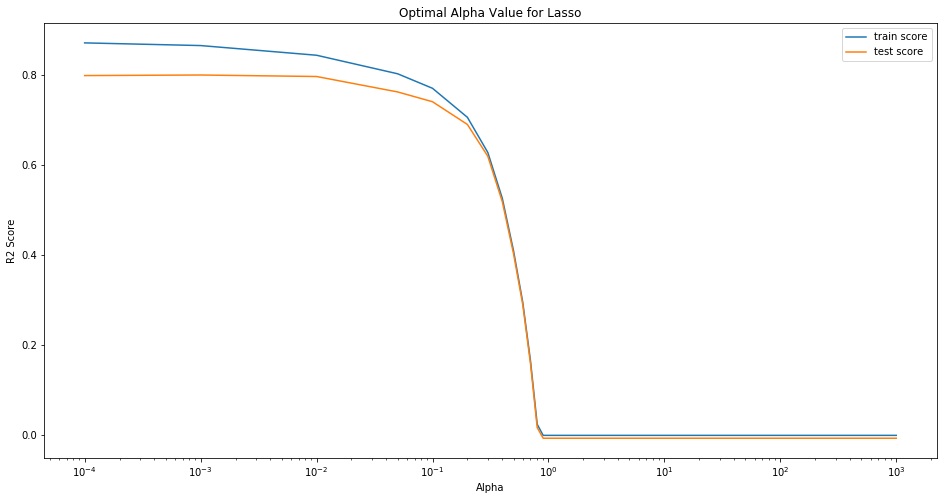

In [103]:
plt.figure(figsize=(16,8))
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score']) #Alpha on x axis and Mean Score on Y axis
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.title("Optimal Alpha Value for Lasso")
plt.show()

In [104]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [105]:
# Building model with alpha value 0.01
lasso = Lasso(alpha=.001 , random_state = 42)
lasso.fit(df_top_train,y_train)

y_train_pred = lasso.predict(df_top_train)
y_test_pred = lasso.predict(df_top_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8598063272297403
0.8805687571235958


In [106]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_top_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
7,2ndFlrSF,0.353428
1,BsmtQual,0.301076
10,KitchenQual,0.30044
49,SaleCondition_Normal,0.196862
50,SaleCondition_Partial,0.182081
18,Condition1_Feedr,0.179484
20,Condition1_PosA,0.174314
44,SaleType_CWD,0.17383
16,MSZoning_RM,0.139845
11,Fireplaces,0.134861


New important features now are :
    - 2ndFlrSF
    - BsmtQual
    - KitchenQual
    - SaleCondition_Normal
    - SaleCondition_Partial
    - Condition1_Feedr
    - Condition1_PosA
    - SaleType_CWD
    - MSZoning_RM
    - Fireplaces


## And the best value for Alpha for Lasso is 0.001 and Ridge is 20